In [ ]:
!git clone -b gpu https://github.com/shpotes/image-classification/
%cd image-classification
!pip install -q -r requirement.txt

In [1]:
import json

import pandas as pd
import tensorflow as tf
import numpy as np

from model.dataset import *
from model.model import *

with open('config.json') as raw_config:
    config = json.load(raw_config)
    
train_source = build_source_from_metadata(pd.read_csv(config['model']['metadata_path']),
                                        config['model']['data_path'], 'train')
train_source[:5]

[('data/train/1dbcf357bdb54d8f865ba30991ce1daf.jpg', 0),
 ('data/train/e5e7782fad7641538bd3328f844df60c.jpg', 2),
 ('data/train/00cb3187d31a4464aeccd2b16be90922.jpg', 1),
 ('data/train/4926a716624b4c44a272549cf9f1ba29.jpg', 2),
 ('data/train/e67dba669cd346a19cb0c88d787141c1.jpg', 2)]

In [2]:
model = ResNet(config)
print(model)

ResNet

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 230, 230, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 112, 112, 64)      9472      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 64)        0         
_________________________________________________________________
res_block (ResBlock)         (None, 56, 56, 64)        74240     
_________________________________________________________________
res_block_1 (ResBlock)       (None, 56, 56, 64)        74240     
_________________________________________________________________
res_block_2 (ResBlock)       (None, 56, 56, 128)

In [5]:
tf.keras.applications.resnet50.ResNet50()

102858752/102853048 [==============================] - 47s 0us/step


In [6]:
res = _

In [7]:
res.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [5]:
def preprocess_image(img, label, model=None, size=(32, 32)):
    img = tf.image.resize(img, size=size)
    img = img / 255.0
    return img, label

dataset = make_dataset(train_source, preprocess_image, training=True, batch_size=3,
                       num_epochs=1, num_parallel_calls=4)
dataset = iter(dataset)

In [6]:
next(dataset)[1]

<tf.Tensor: id=53, shape=(3,), dtype=int32, numpy=array([1, 0, 0], dtype=int32)>

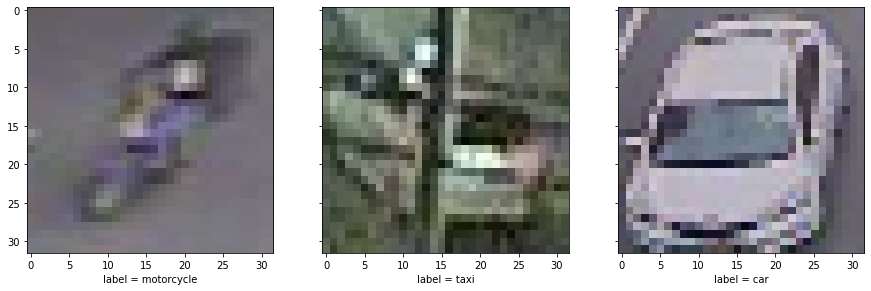

In [13]:
imshow_batch_of_three(next(dataset), config['model']['labels'])

In [15]:
print(model)

ResNet

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 109, 109, 64)      9472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
res_block_3 (ResBlock)       (None, 36, 36, 64)        74368     
_________________________________________________________________
res_block_4 (ResBlock)       (None, 36, 36, 64)        74368     
_________________________________________________________________
res_block_5 (ResBlock)       (None, 36, 36, 64)        82688     
Total params: 240,896
Trainable params: 240,128
Non-trainable params: 768
_________________________________________________________________
